<a href="https://colab.research.google.com/github/ridwanbello/Facial_expression_with_NISFE/blob/master/Facial_Expression_Recognition_with_NISFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FACE DETECTION AND CROPPING SECTION



In [ ]:
#FACE DETECTION AND CROPPING CODE
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
!pip install facenet-pytorch
from facenet_pytorch import MTCNN
mtcnn = MTCNN()
#lOAD THE VIDEO
from PIL import Image
import os
print(os.getcwd())
num_files = list(range(1000))
path = 'C:/Users/Ridwan Bello/Desktop/Dataset/RIDWAN UI/UI'
save_paths = save_path = [f'face2_{i}.jpg' for i in range(len(num_files))]
for file_, newpath in zip(sorted(os.listdir(path)), save_paths):
    if file_[-1] == 'g':
        im = Image.open(path+'/'+file_)
        mtcnn(im, save_path=newpath)
        

PRE-PROCESSING WITH CLAHE SECTION

In [ ]:
#PRE-PROCESSING CODE
# Importing necessary libraries
import cv2 
import numpy as np

# Create a function for CLAHE Histogram Equalization
def improve_contrast_image_using_clahe(bgr_image: np.array) -> np.array:
    hsv = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
    hsv_planes = cv2.split(hsv)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    hsv_planes[2] = clahe.apply(hsv_planes[2])
    hsv = cv2.merge(hsv_planes)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
  
  #import cv2
import glob, os, errno

# Replace mydir with the directory you want
mydir = r'C:\Users\Ridwan Bello\Desktop\processing/all/expr/angry'

#check if directory exist, if not create it
try:
    os.makedirs(mydir)
except OSError as e:
    if e.errno == errno.EEXIST:
        raise
for fil in glob.glob("*.jpg"):
    image = cv2.imread(fil) 
    gray_image = improve_contrast_image_using_clahe(image)
    #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert to greyscale
    cv2.imwrite(os.path.join(mydir,fil),gray_image) # write to location with same name

TRAINING, VALIDATION AND TESTING SECTION

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix

import cv2
import os

import numpy as np

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15433160917532935768
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11320098816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7900032430327655165
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
 xla_global_id: 416903419]

In [ ]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/MyDrive/dats.zip"

Archive:  /content/gdrive/MyDrive/dats.zip
   creating: dats/train/
   creating: dats/train/angry/
  inflating: dats/train/angry/angryss441.jpg  
  inflating: dats/train/angry/angryss442.jpg  
  inflating: dats/train/angry/angryss443.jpg  
  inflating: dats/train/angry/angryss444.jpg  
  inflating: dats/train/angry/angryss445.jpg  
  inflating: dats/train/angry/angryss446.jpg  
  inflating: dats/train/angry/angryss447.jpg  
  inflating: dats/train/angry/angryss448.jpg  
  inflating: dats/train/angry/angryss449.jpg  
  inflating: dats/train/angry/angryss450.jpg  
  inflating: dats/train/angry/angryss451.jpg  
  inflating: dats/train/angry/angryss452.jpg  
  inflating: dats/train/angry/angryss453.jpg  
  inflating: dats/train/angry/angryss454.jpg  
  inflating: dats/train/angry/angryss455.jpg  
  inflating: dats/train/angry/angryss456.jpg  
  inflating: dats/train/angry/angryss457.jpg  
  inflating: dats/train/angry/angryss458.jpg  
  inflating: dats/train/angry/angryss459.jpg  
  inflat

In [ ]:
INIT_LR = 1e-4
BS = 16
NUM_EPOCHS = 20
CLASSES=["Angry","Fear","Happy","Sad","Surprise"]

In [ ]:
#Now we can easily fetch our train and validation data.
import os
BASE_PATH = "/content/dats"
TRAIN_PATH = os.path.sep.join([BASE_PATH, "train"])
VAL_PATH = os.path.sep.join([BASE_PATH, "val"])

In [ ]:
totalTrain = len(list(paths.list_images(TRAIN_PATH)))
totalVal = len(list(paths.list_images(VAL_PATH)))
#totalTest = len(list(paths.list_images(config.TEST_PATH)))

In [ ]:
# initialize the training training data augmentation object
trainAug = ImageDataGenerator(
	#rescale=1./255,
	rotation_range=25,
	zoom_range=0.2,
	width_shift_range=0.1,
	height_shift_range=0.1,
	shear_range=0.2,
	horizontal_flip=True,
	fill_mode="nearest")
# initialize the validation/testing data augmentation object (which
# we'll be adding mean subtraction to)
valAug = ImageDataGenerator()
# define the ImageNet mean subtraction (in RGB order) and set the
# the mean subtraction value for each of the data augmentation
# objects
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
trainAug.mean = mean
valAug.mean = mean

In [ ]:
# initialize the training generator
trainGen = trainAug.flow_from_directory(
	TRAIN_PATH,
	class_mode="categorical",
	target_size=(224, 224),
	color_mode="rgb",
	shuffle=True,
	batch_size=BS)


# initialize the validation generator
valGen = valAug.flow_from_directory(
	VAL_PATH,
	class_mode="categorical",
	target_size=(224, 224),
	color_mode="rgb",
	shuffle=False,
	batch_size=BS)

Found 2273 images belonging to 5 classes.
Found 572 images belonging to 5 classes.


In [ ]:
X_train, y_train = next(trainGen)

In [ ]:
X_test, y_test = next(valGen)

In [ ]:
X_train.shape

(16, 224, 224, 3)

In [ ]:
totalTrain = len(list(paths.list_images(TRAIN_PATH)))
totalVal = len(list(paths.list_images(VAL_PATH)))
#totalTest = len(list(paths.list_images(config.TEST_PATH)))

VGG FACE MODEL TESTING

In [ ]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-vi7wgn19
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-vi7wgn19
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8325 sha256=ece9ac1734203edd4b8d4d6b8171db9f291618475064e0f7bb93dd036f0cca10
  Stored in directory: /tmp/pip-ephem-wheel-cache-b06x886i/wheels/08/df/86/0225d44647ab2256dbf1e006823288fe9cc86367a056e6ea2c
Successfully built keras-vggface


In [ ]:
!pip install keras_vggface

In [ ]:
!pip install keras_applications

     |████████████████████████████████| 50 kB 2.8 MB/s 


In [ ]:
from keras_vggface.vggface import VGGFace
from keras import Model
from keras.layers import Flatten, Dense, Input

In [ ]:
nb_class = 5

vgg_model = VGGFace(model='resnet50',include_top=False, input_shape=(224, 224, 3))
last_layer = vgg_model.get_layer('avg_pool').output
x = Flatten(name='flatten')(last_layer)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
out = Dense(nb_class, activation='softmax', name='classifier')(x)
custom_vgg_model = Model(vgg_model.input, out)
for layer in vgg_model.layers:
	layer.trainable = False

94707712/94694792 [==============================] - 1s 0us/step


In [ ]:
# compile the model
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / NUM_EPOCHS)
custom_vgg_model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the model
print("[INFO] training model...")
H = custom_vgg_model.fit_generator(
	generator=trainGen,
	steps_per_epoch=totalTrain // BS,
	validation_data=valGen,
	validation_steps=totalVal // BS,
	epochs=NUM_EPOCHS)

[INFO] training model...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


Epoch 1/20
142/142 [==============================] - 462s 3s/step - loss: 2.5762 - accuracy: 0.3952 - val_loss: 1.0203 - val_accuracy: 0.6250
Epoch 2/20
142/142 [==============================] - 429s 3s/step - loss: 1.3189 - accuracy: 0.5538 - val_loss: 0.7935 - val_accuracy: 0.6964
Epoch 3/20
142/142 [==============================] - 426s 3s/step - loss: 1.0028 - accuracy: 0.6309 - val_loss: 0.7043 - val_accuracy: 0.7464
Epoch 4/20
142/142 [==============================] - 426s 3s/step - loss: 0.8991 - accuracy: 0.6681 - val_loss: 0.6658 - val_accuracy: 0.7625
Epoch 5/20
142/142 [==============================] - 427s 3s/step - loss: 0.7615 - accuracy: 0.7027 - val_loss: 0.6055 - val_accuracy: 0.7714
Epoch 6/20
142/142 [==============================] - 426s 3s/step - loss: 0.7204 - accuracy: 0.7337 - val_loss: 0.5911 - val_accuracy: 0.7875
Epoch 7/20
142/142 [==============================] - 425s 3s/step - loss: 0.6749 - accuracy: 0.7457 - val_loss: 0.5486 - val_accuracy: 0.7875

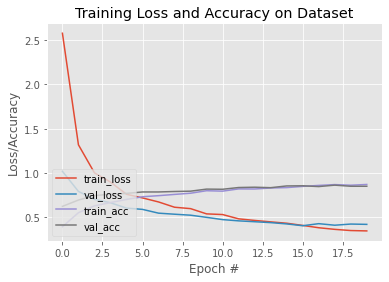

In [ ]:
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [ ]:
%matplotlib inline

In [ ]:

!mkdir -p nifer_model
custom_vgg_model.save('nifer_model/my_model') 

INFO:tensorflow:Assets written to: nifer_model/my_model/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [ ]:
new_model = tf.keras.models.load_model('nifer_model/my_model')

# Check its architecture
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                             

In [ ]:
!zip -r model.zip /content/nifer_model

  adding: content/nifer_model/ (stored 0%)
  adding: content/nifer_model/my_model/ (stored 0%)
  adding: content/nifer_model/my_model/variables/ (stored 0%)
  adding: content/nifer_model/my_model/variables/variables.index (deflated 79%)
  adding: content/nifer_model/my_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/nifer_model/my_model/keras_metadata.pb (deflated 95%)
  adding: content/nifer_model/my_model/saved_model.pb (deflated 92%)
  adding: content/nifer_model/my_model/assets/ (stored 0%)


In [ ]:
try:
  from google.colab import files
  files.download('./model.zip')
except ImportError:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

EVALUATION SECTION

In [ ]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    VAL_PATH, # Put your path here
     target_size=(224, 224),
    batch_size=16,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = custom_vgg_model.predict(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 572 images belonging to 5 classes.


In [ ]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())

predicted_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 4, 3, 3, 3, 3, 0,
       0, 3, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 2, 2, 4, 3, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 4, 4, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 4, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

       angry       0.88      0.85      0.87       117
        fear       0.95      0.81      0.87       109
       happy       0.84      0.94      0.89       115
         sad       0.78      0.81      0.79       119
    surprise       0.84      0.87      0.85       112

    accuracy                           0.85       572
   macro avg       0.86      0.85      0.86       572
weighted avg       0.86      0.85      0.86       572



# Hyperparameters Used with VGGFace Model
## Pre-trained Weights: ResNet50
## Epochs: 10
## Optimizer: Adam
## Learning Rate: 0.0001
## Accuracy: 0.85
## Loss: 0.3
